## Motivation

Imagine you have an image that really interests you, and you want it as a wallpaper but sadly it has not the right dimension even if you scale it, it would be a shame to just throw the image in your wastebasket and have to forget what could have been your wallpaper of 20XX. A solution could be to fill the parts on the sides, above/under the image with neighbouring pixel colors, and this is what this project aims to do.

First import your image

In [1]:
%matplotlib inline
import numpy as np

In [2]:
import PIL, requests
image = np.array(PIL.Image.open(requests.get('https://pbs.twimg.com/media/DJUEgzAVYAAHbkB.png', stream=True).raw)) / 255

In [3]:
import matplotlib.pyplot as plt

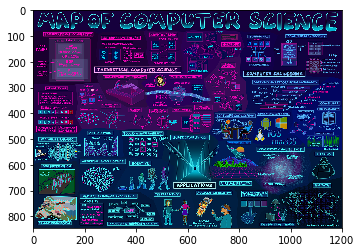

In [4]:
plt.imshow(image)

image size:

In [5]:
h = len(image)
w = len(image[0])
print("w: %d" % w)
print("h: %d" % h)

w: 1200
h: 845


Desired size:

In [6]:
width = 1920
height = 1080

In [7]:
result = np.zeros((height,width,len(image[0,0])))

In [8]:
startx = (width - w)//2
starty = (height - h)//2
print("startx: {}".format(startx))
print("starty: {}".format(starty))

startx: 360
starty: 117


In [9]:
for y in range(h):
    for x in range(w):
        result[starty + y, startx + x] = image[y,x]

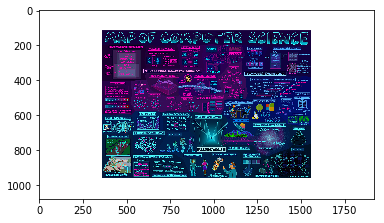

In [10]:
plt.imshow(result)

In [11]:
class D:
    Left, Down, Right, Up = range(4)

In [12]:
n = 20

In [13]:
left_kernel = np.array([(j, -i - 1) for i in range(n) for j in range(i - n + 1, n - i)])
down_kernel = np.array([(i + 1, j) for i in range(n) for j in range(i - n + 1, n - i)])
right_kernel = np.array([(j, i + 1) for i in range(n) for j in range(i - n + 1, n - i)])
up_kernel = np.array([(-i - 1, j) for i in range(n) for j in range(i - n + 1, n - i)])

def kernel(d):
    return {
       D.Left: left_kernel,
       D.Down: down_kernel,
       D.Right: right_kernel,
       D.Up: up_kernel
    }[d]

def convolute(y, x, d, minx=0, maxx=width-1, miny=0, maxy=height-1):
    return np.mean(result[np.clip([y,x] + kernel(d),[miny,minx],[maxy,maxx]).T.tolist()], axis=0)

In [14]:
for y in reversed(range(starty)):
    for x in range(startx, startx + w):
        result[y, x] = convolute(y, x, D.Down, minx = startx, maxx = startx + w - 1)

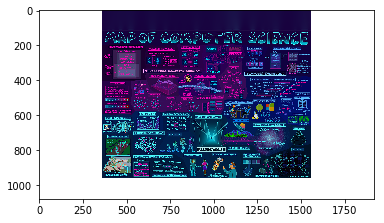

In [15]:
plt.imshow(result)

In [16]:
for y in range(starty+h, height):
    for x in range(startx, startx + w):
        result[y, x] = convolute(y, x, D.Up, minx = startx, maxx = startx + w - 1)

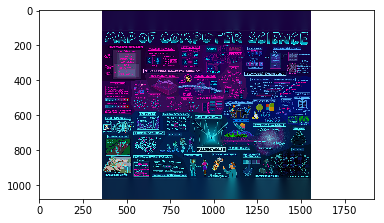

In [17]:
plt.imshow(result)

In [18]:
for x in reversed(range(startx)):
    for y in range(height):
        result[y, x] = convolute(y,x,D.Right)

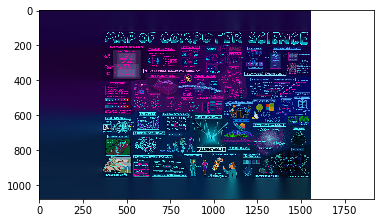

In [19]:
plt.imshow(result)

In [20]:
for x in range(startx + w, width):
    for y in range(height):
        result[y, x] = convolute(y,x,D.Left)

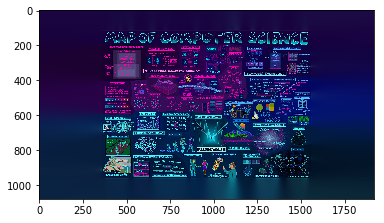

In [21]:
plt.imshow(result)

In [22]:
import scipy.misc

scipy.misc.imsave('result.png', result[:,:,:3])